<a href="https://colab.research.google.com/github/DCAISP/Audio-Classification/blob/main/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [ ]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-7-99cc85cc827f>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* http://suanlab.com/datasets/GeneralMidi.wav



In [ ]:
!wget http://suanlab.com/datasets/GeneralMidi.wav

--2024-02-22 21:12:54--  http://suanlab.com/datasets/GeneralMidi.wav
Resolving suanlab.com (suanlab.com)... 52.219.206.32, 52.219.206.28, 52.219.202.0, ...
Connecting to suanlab.com (suanlab.com)|52.219.206.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3409459756 (3.2G) [audio/wav]
Saving to: ‘GeneralMidi.wav.1’

GeneralMidi.wav.1     2%[                    ]  80.46M  18.5MB/s    eta 3m 32s ^C


In [ ]:
midi_file = "./GeneralMidi.wav"

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

In [ ]:
instruments = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
num_notes = 50
sec = 2

audio = []
inst = []
for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)):
  instrument = instruments[inst_idx]
  offset = (instrument*num_notes*sec) + (note*sec)
  print('instrument: {}, note: {}, offset: {}'.format(instrument, note, offset))
  y, sr = librosa.load(midi_file, sr=None, offset=offset, duration=2.0)
  audio.append(y)
  inst.append(inst_idx)

  '''
  instruments 에서는 사용되는 악기의 개수를 의미
  그리고 노트는 음이 50개를 말함
  그리고 2초간격으로 존재
  '''


instrument: 0, note: 0, offset: 0
instrument: 0, note: 1, offset: 2
instrument: 0, note: 2, offset: 4
instrument: 0, note: 3, offset: 6
instrument: 0, note: 4, offset: 8
instrument: 0, note: 5, offset: 10
instrument: 0, note: 6, offset: 12
instrument: 0, note: 7, offset: 14
instrument: 0, note: 8, offset: 16
instrument: 0, note: 9, offset: 18
instrument: 0, note: 10, offset: 20
instrument: 0, note: 11, offset: 22
instrument: 0, note: 12, offset: 24
instrument: 0, note: 13, offset: 26
instrument: 0, note: 14, offset: 28
instrument: 0, note: 15, offset: 30
instrument: 0, note: 16, offset: 32
instrument: 0, note: 17, offset: 34
instrument: 0, note: 18, offset: 36
instrument: 0, note: 19, offset: 38
instrument: 0, note: 20, offset: 40
instrument: 0, note: 21, offset: 42
instrument: 0, note: 22, offset: 44
instrument: 0, note: 23, offset: 46
instrument: 0, note: 24, offset: 48
instrument: 0, note: 25, offset: 50
instrument: 0, note: 26, offset: 52
instrument: 0, note: 27, offset: 54
instrum

변수 설명:

instruments : 인스트루먼트의 리스트입니다. 각 인스트루먼트는 0부터 90까지 10 단위로 나타내어져 있습니다.
num_notes : 각 인스트루먼트당 노트의 갯수입니다. 이 코드에서는 각 인스트루먼트당 50개의 노트를 갖는다고 가정하고 있습니다.
sec : 각 노트의 길이를 초 단위로 나타냅니다. 이 코드에서는 각 노트가 2초라고 가정하고 있습니다.
코드의 흐름:

itertools.product 함수를 이용해 인스트루먼트와 노트의 모든 가능한 조합을 생성합니다.
각 조합에 대해, instrument는 사용되는 인스트루먼트를, note는 노트의 번호를, offset은 해당 노트가 시작되는 시간을 초 단위로 나타냅니다. offset은 인스트루먼트와 노트의 번호에 따라 결정됩니다.
librosa.load 함수를 이용해, MIDI 파일에서 offset 초부터 2초 동안의 오디오를 로드합니다. 로드된 오디오는 y에, 샘플링 레이트는 sr에 저장됩니다.
로드된 오디오와 인스트루먼트의 인덱스는 각각 audio와 inst 리스트에 추가됩니다

-for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)): itertools.product 함수는 입력으로 받은 두 개의 반복 가능한 객체(여기서는 인스트루먼트의 개수와 노트의 개수) 간의 카르테지안 곱을 반환합니다. 즉, 인스트루먼트와 노트의 모든 가능한 조합을 생성합니다.

-instrument = instruments[inst_idx] 현재 인덱스에 해당하는 인스트루먼트를 선택합니다.

-offset = (instrument * num_notes * sec) + (note * sec) offset은 현재 노트가 시작되는 시간을 초 단위로 계산합니다. 이는 인스트루먼트의 번호, 노트의 번호, 그리고 노트당 시간(sec)을 이용해 계산합니다.

-print('instrument: {}, note: {}, offset: {}'.format(instrument, note, offset)) 현재 인스트루먼트, 노트, 그리고 노트의 시작 시간을 출력합니다.

-y, sr = librosa.load(midi_file, sr=None, offset=offset, duration=2.0) librosa.load 함수를 이용해 MIDI 파일을 로드합니다. sr=None은 원래의 샘플링 레이트를 유지하겠다는 의미이며, offset과 duration 파라미터를 통해 특정 부분의 오디오만 로드합니다.

-audio.append(y) 로드한 오디오 데이터를 audio 리스트에 추가합니다.

-inst.append(inst_idx) 현재 인스트루먼트의 인덱스를 inst 리스트에 추가합니다. 이 정보는 나중에 어떤 인스트루먼트가 사용되었는지를 확인하는 데 사용될 수 있습니다.

In [ ]:
import numpy as np

audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)

print(audio_np.shape, inst_np.shape)

'''
88200개라는 어마어마한 데이터 길이를 가지고 있음
'''

(500, 88200) (500,)


'\n88200개라는 어마어마한 데이터 길이를 가지고 있음\n'

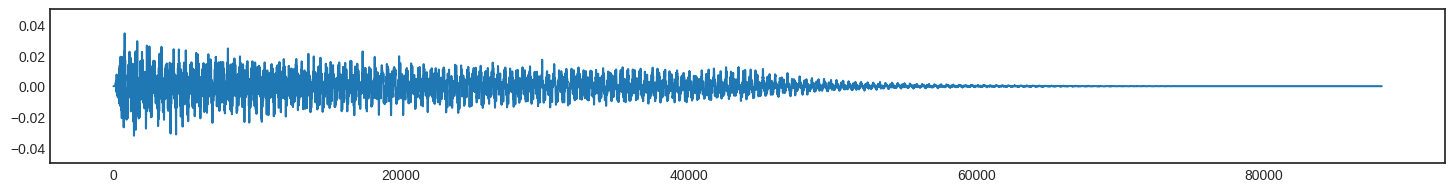

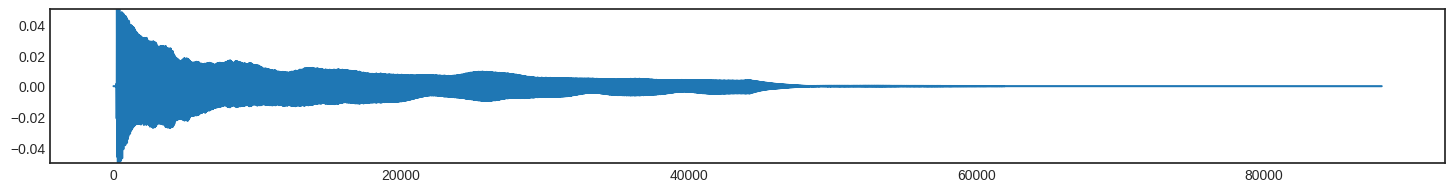

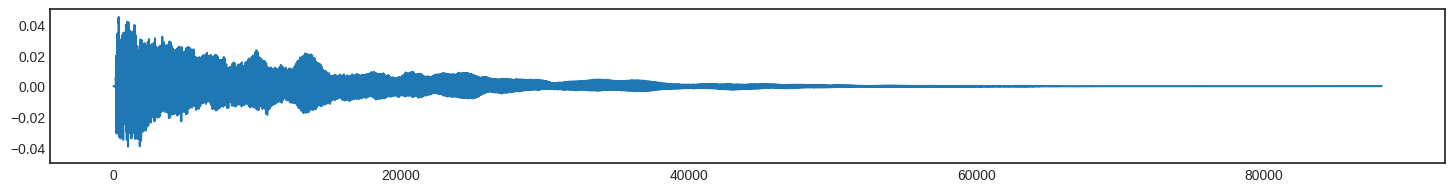

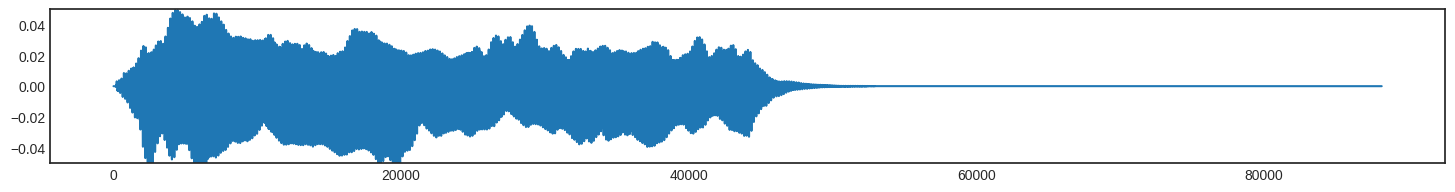

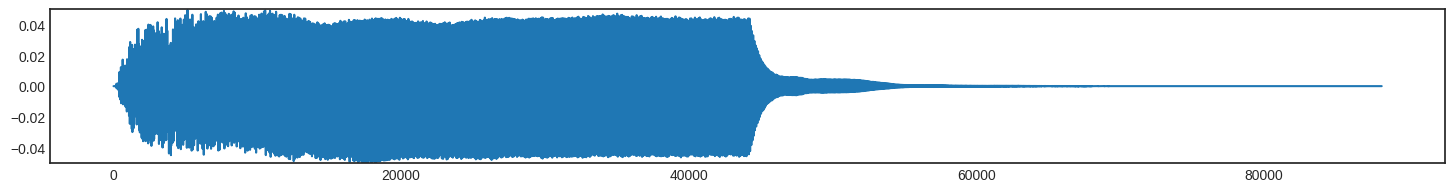

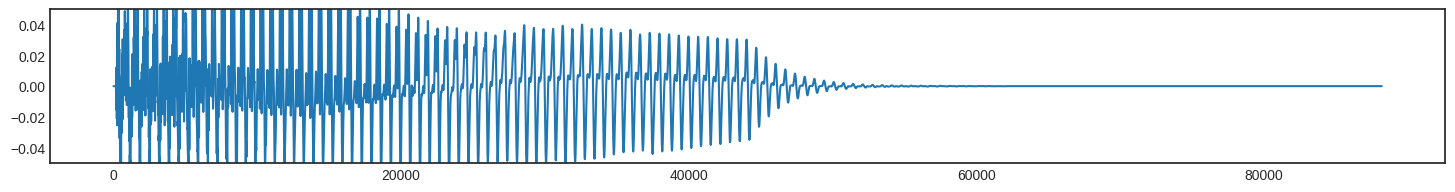

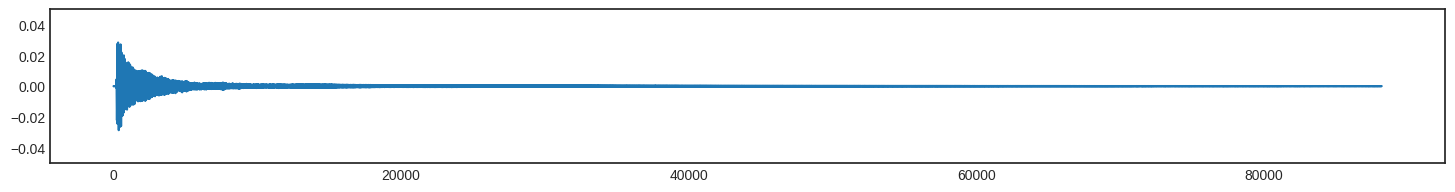

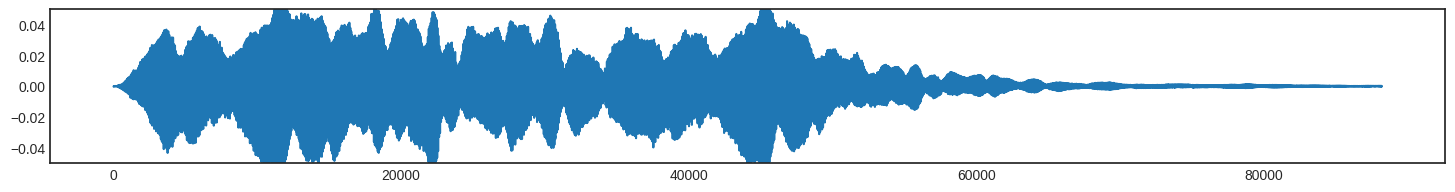

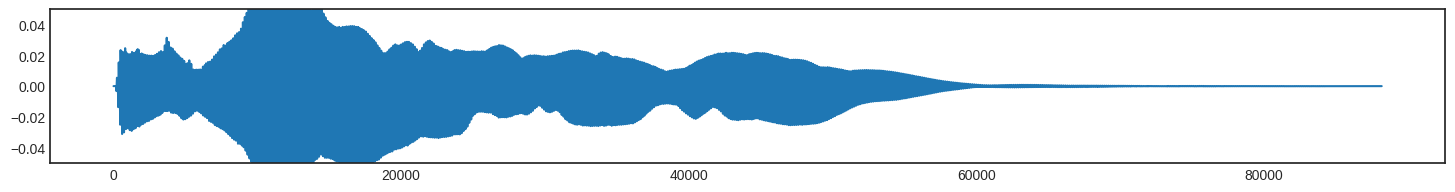

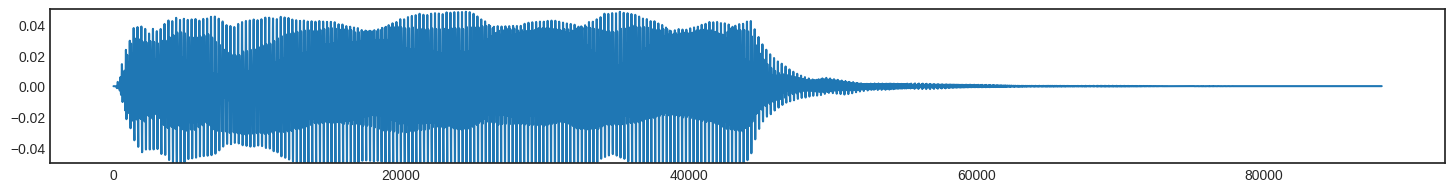

In [ ]:
for idx in range(0, len(audio_np), num_notes):
  plt.figure(figsize = (18, 2))
  plt.plot(audio_np[idx])
  plt.ylim(-0.05, 0.05)
  plt.show()

-현재 50개의 음을 가진 총 10개의 악기에 대한 그래프가 나온 것이다. 그리고 소리에 따른 waveform이 다르다는 것을 확인할 수 있다.

In [ ]:
print(inst_np[0])
ipd.Audio(audio_np[0], rate=sr)

0


In [ ]:
print(inst_np[50])
ipd.Audio(audio_np[50], rate=sr)

1


In [ ]:
print(inst_np[100])
ipd.Audio(audio_np[100], rate=sr)

2


In [ ]:
print(inst_np[200])
ipd.Audio(audio_np[200], rate=sr)

4


In [ ]:
print(inst_np[150])
ipd.Audio(audio_np[150], rate=sr)

3


In [ ]:
print(inst_np[200])
ipd.Audio(audio_np[200], rate=sr)

4


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(train_y.shape)

(400, 88200)
(100, 88200)
(400,)
(400,)


위 코드에서 test_size 가 20퍼센트 이므로 test에 100개 나머지 train에 400개로 잘 분배가 된 것을 확인할 수 있다,

### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.08


위 코드를 보면 4퍼센트의 정확도가 나온 것을 확인 할 수 있는데 굉장히 안좋은 것.

### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.06


결과는 5퍼센트...

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.41


결과 28퍼센트 괜춘

## Constant-Q를 이용한 머신러닝 오디오 분류

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

*   주파수 대역을 저장할 리스트 `audio_cqt` 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



In [ ]:
audio_cqt = []
for y in audio :
  ret = librosa.cqt(y, sr=sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
  ret = np.abs(ret)
  audio_cqt.append(ret)


* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

<ipython-input-18-426a42d25bab>:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')


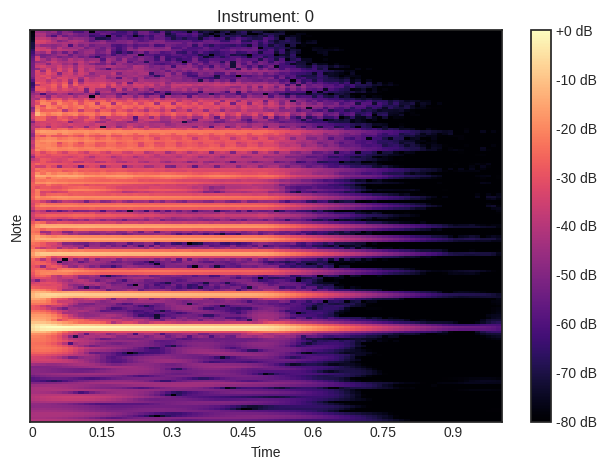

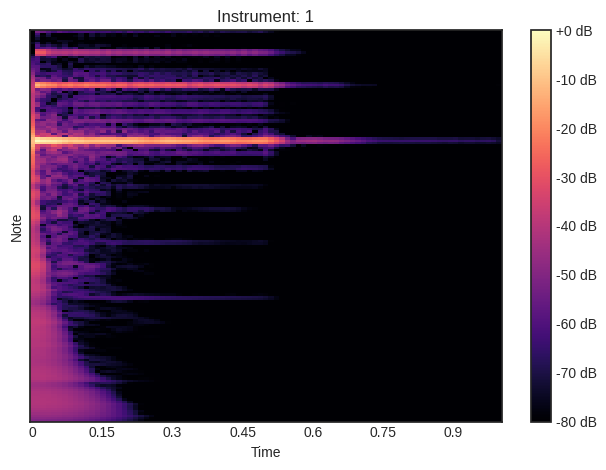

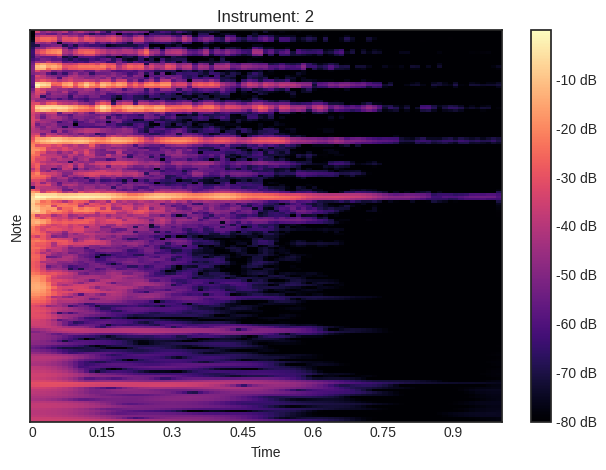

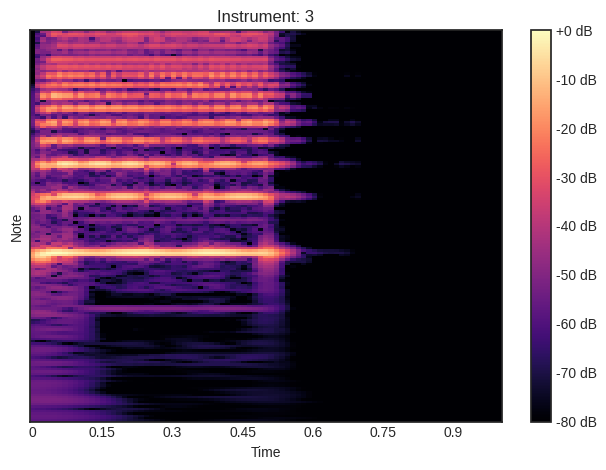

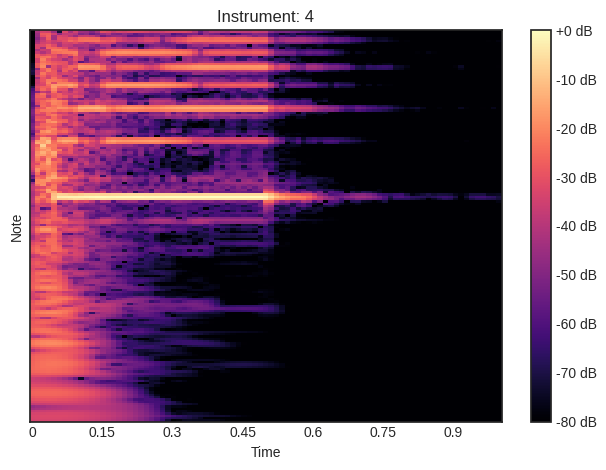

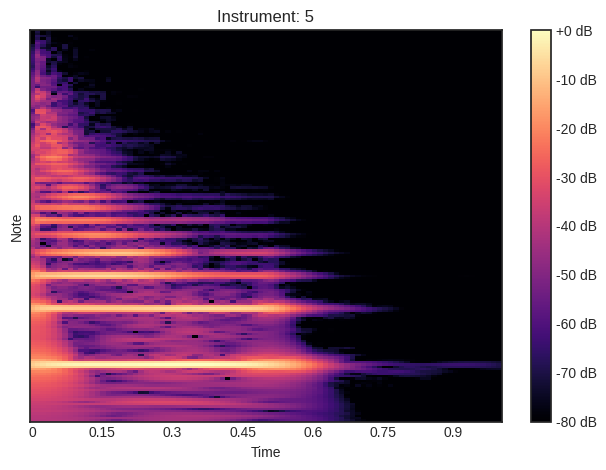

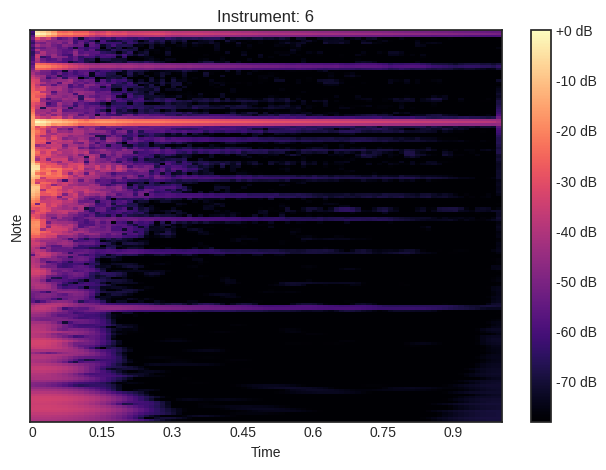

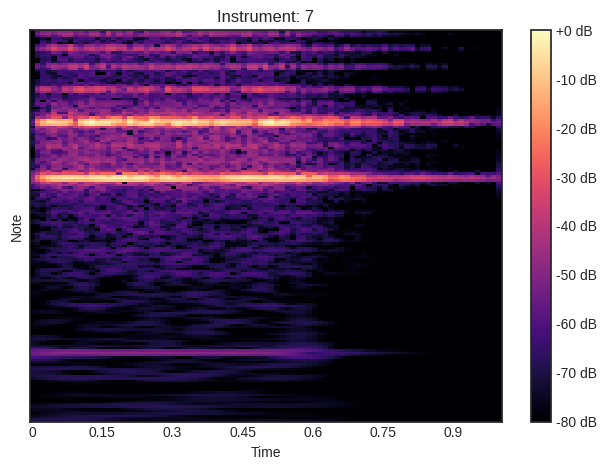

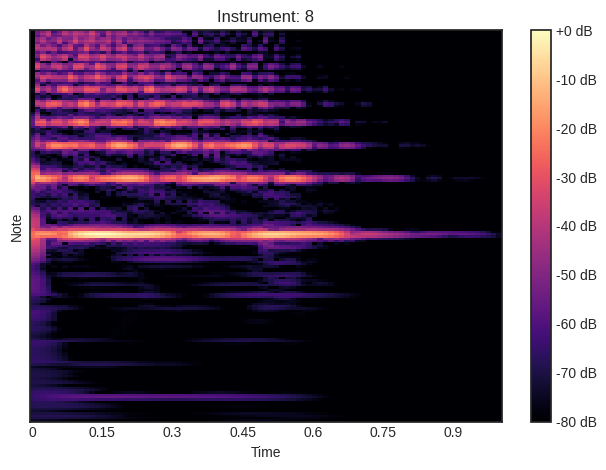

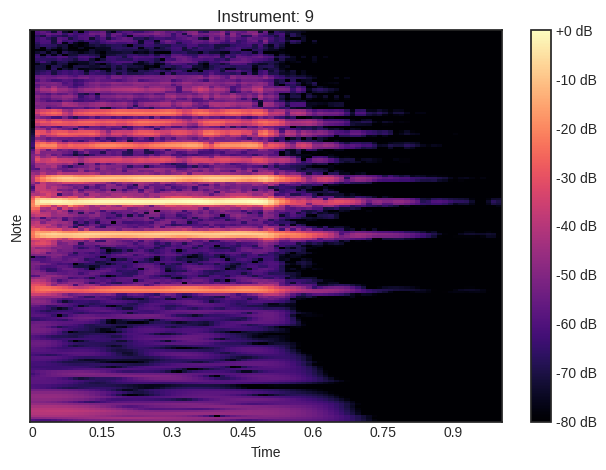

In [ ]:
for i in range(0, len(instruments)*num_notes, num_notes):
  amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref=np.max)
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Instrument: {}'.format(inst[i]))
  plt.tight_layout()
  plt.show()

-이 코드는 각각의 인스트루먼트에 대해 CQT(Continuous Q Transform)를 수행한 결과를 데시벨(db) 단위로 변환하는 작업을 수행하고 있습니다.

for i in range(0, len(instruments)*num_notes, num_notes): 이 코드는 각 인스트루먼트를 순회하는 반복문입니다. 인덱스 i는 각 인스트루먼트의 첫 번째 노트의 인덱스를 가리킵니다. range 함수의 세 번째 인자인 num_notes가 각 스텝마다 더해지므로, i는 각 인스트루먼트의 첫 번째 노트 인덱스를 가리키게 됩니다.

-amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref=np.max) 이 코드는 audio_cqt[i]의 절대값을 계산한 후, 이를 데시벨(db) 단위로 변환합니다.

-librosa.amplitude_to_db 함수는 파라미터로 받은 값의 데시벨값을 계산하며, ref=np.max는 변환된 데시벨 스케일의 기준점을 최대값으로 설정하라는 의미입니다. 이렇게 계산된 데시벨 값은 amp_db에 저장됩니다.
즉, 이 코드는 각 인스트루먼트의 첫 번째 노트에 대해 CQT 변환된 결과를 데시벨 단위로 변환하고 그 값을 amp_db에 저장하는 작업을 수행합니다

현재 0부터 500개를 만드는데 500개 다 출력하기 그러니까 step을 50단위로 한것이다. 그럼, 하나가 첫번째 악기 음에 대해 시각화 하는 것이다.

* 훈련 데이터와 실험 데이터를 분리

In [ ]:
cqt_np = np.array(audio_cqt, np.float32)
inst_np = np.array(inst, np.int16)

print(cqt_np.shape, inst_np.shape)

(500, 168, 87) (500,)


현재, audio_cqt(주파수 대역) 가 500, 168, 87의 3차원 벡터로 변환 된 것임 shape로 확인가능



*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
cqt_np = cqt_np.reshape((500, 168*87))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cqt_np, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(train_y.shape)

(400, 14616)
(100, 14616)
(400,)
(400,)


기존의 데이터는 88200 인데, 14616으로 확실히 준 것을 확인 할 수 있다. (scaling을 진행했기 때문이다.)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.28


### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.23


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.66


쓸만하다 ㅎㅎㅎ 66퍼센트

## Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_np = cqt_np.reshape((500, 168*87))
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
  model = Sequential()

  input = Input(shape=(14616, ), name = 'input')
  output = Dense(512, activation='relu', name='hidden1')(input)
  output = Dense(256, activation='relu', name='hidden2')(output)
  output = Dense(128, activation='relu', name='hidden3')(output)
  output = Dense(10, activation='softmax', name='hidden4')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])

  return model

-from keras.models import Sequential, Model Keras에서 Sequential 모델과 Model 클래스를 불러옵니다. Sequential 모델은 레이어를 순차적으로 쌓는 간단한 모델이며, Model 클래스는 더 복잡한 모델을 만들 수 있습니다.
from keras.layers import Input, Dense Keras에서 Input 레이어와 Dense 레이어를 불러옵니다. Input 레이어는 모델의 입력을 정의하고, Dense 레이어는 완전 연결 레이어를 추가합니다.

-def models_build(): 'models_build'라는 함수를 정의합니다. 이 함수는 위에서 불러온 클래스들을 이용해 모델을 생성하고 컴파일한 후 반환합니다.

-model = Sequential() Sequential 모델을 생성합니다. 하지만 이후에는 Functional API를 이용해 모델을 구성하므로, 이 코드는 실제로는 사용되지 않습니다.

-input = Input(shape=(14616, ), name='input') Input 레이어를 정의합니다. 이 레이어는 14616개의 요소를 가진 벡터를 입력으로 받습니다.

-output = Dense(512, activation='relu', name='hidden1')(input) 첫 번째 Dense 레이어를 추가합니다. 이 레이어는 512개의 노드를 가지며, 활성화 함수로는 ReLU를 사용합니다.

-output = Dense(256, activation='relu', name='hidden2')(output) 두 번째 Dense 레이어를 추가합니다. 이 레이어는 256개의 노드를 가지며, 활성화 함수로는 ReLU를 사용합니다.

-output = Dense(128, activation='relu', name='hidden3')(output) 세 번째 Dense 레이어를 추가합니다. 이 레이어는 128개의 노드를 가지며, 활성화 함수로는 ReLU를 사용합니다.

-output = Dense(10, activation='softmax', name='hidden4')(output) 네 번째 Dense 레이어를 추가합니다. 이 레이어는 10개의 노드를 가지며, 활성화 함수로는 소프트맥스를 사용합니다. 이 레이어는 일반적으로 다중 클래스 분류 문제에서 출력 레이어로 사용됩니다.

-model = Model(inputs=[input], outputs=output) 지금까지 정의한 레이어들을 이용해 모델을 생성합니다.

-model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) 모델을 컴파일합니다. 이 때, 최적화 알고리즘으로는 Adam을, 손실 함수로는 범주형 크로스 엔트로피를, 평가 지표로는 정확도를 사용합니다.

-return model 컴파일된 모델을 반환합니다. 이 모델은 이후에 학습에 사용될 수 있습니다

-교차엔트로피도 말그대로 오차제곱을 나타내는 것중에 하나로써, 값이 작으면 작을수록 오차가 적기 때문에 정답에 더 가깝다는 것이다. (손실함수 사용목적 맞음)

In [ ]:
model = model_build()
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14616)]           0         
                                                                 
 hidden1 (Dense)             (None, 512)               7483904   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7649418 (29.18 MB)
Trainable params: 7649418 (29.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 2s 284ms/step - loss: 2.2588 - acc: 0.1219 - val_loss: 2.1681 - val_acc: 0.2500
Epoch 2/30
3/3 [==============================] - 0s 143ms/step - loss: 1.9513 - acc: 0.4219 - val_loss: 2.0530 - val_acc: 0.2625
Epoch 3/30
3/3 [==============================] - 0s 168ms/step - loss: 1.6544 - acc: 0.4531 - val_loss: 1.9446 - val_acc: 0.2750
Epoch 4/30
3/3 [==============================] - 0s 134ms/step - loss: 1.3854 - acc: 0.5344 - val_loss: 1.8488 - val_acc: 0.2875
Epoch 5/30
3/3 [==============================] - 0s 172ms/step - loss: 1.1313 - acc: 0.6156 - val_loss: 1.8431 - val_acc: 0.3250
Epoch 6/30
3/3 [==============================] - 0s 140ms/step - loss: 0.9216 - acc: 0.7719 - val_loss: 1.9150 - val_acc: 0.3750
Epoch 7/30
3/3 [==============================] - 0s 156ms/step - loss: 0.7348 - acc: 0.8313 - val_loss: 2.0121 - val_acc: 0.3625
Epoch 8/30
3/3 [==============================] - 0s 155ms/step - loss: 0.5869 - acc: 0.87

-정확도가 0.4 나오는 것을 보았을 때, 굉장히 안좋은 것을 알 수있음. 오버피팅도 많이 일어남

-에포크(epoch)'는 머신러닝에서 사용되는 용어로, 전체 훈련 데이터셋에 대해 한 번 학습을 진행하는 것을 의미

In [ ]:
def plot_history(history_dict):
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(loss) + 1)
  fig = plt.figure(figsize=(14, 5))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, loss, 'b--', label='train_loss')
  ax1.plot(epochs, val_loss, 'r:', label='val_loss')
  ax1.set_xlabel('Epoches')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  acc = history_dict['acc']
  val_acc = history_dict['val_acc']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, acc, 'b--', label='train_accuracy')
  ax2.plot(epochs, val_acc, 'r:', label='val_accuracy')
  ax2.set_xlabel('Epoches')
  ax2.set_ylabel('ACC')
  ax2.grid()
  ax2.legend()

  plt.show()

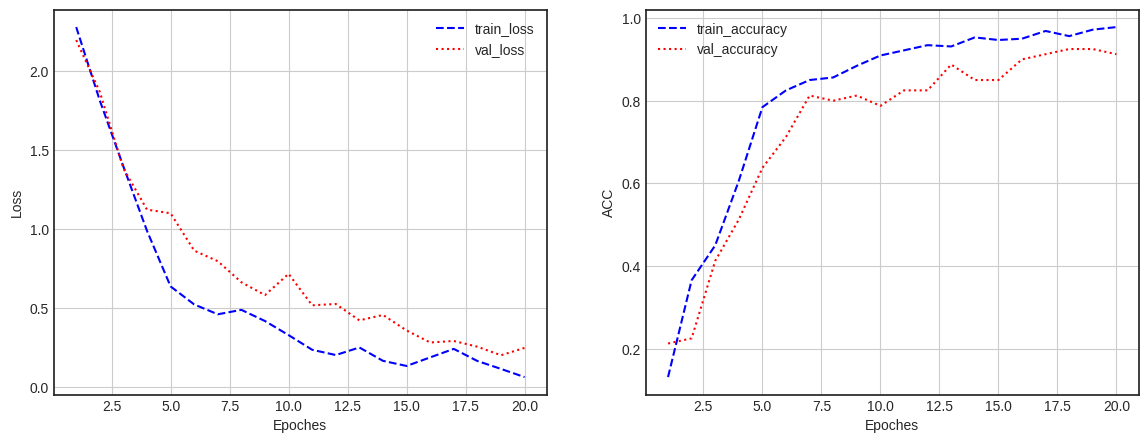

In [ ]:
plot_history(history.history)

-학습은 잘 된것을 확인할 수 있지만, validation이멀어지는 모습을 보면서, 오버피팅이 굉장히 많이 일어났다는 것을 알 수 있다.

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 14ms/step - loss: 4.5152 - acc: 0.4200


[4.515229225158691, 0.41999998688697815]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 10)


-reshape을 해주지 않아서, 168, 87의 2차원 형태로 나오는 것을 알 수 있음

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
  model = Sequential()

  input = Input(shape=(168, 87, 1))

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dense(258, activation='relu')(output)
  output = Dense(126, activation='relu')(output)

  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])

  return model

In [ ]:
model = model_build()
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 168, 87, 1)]      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 168, 87, 128)      1280      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 84, 44, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 84, 44, 128)       147584    
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 42, 22, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 42, 22, 128)       147

In [ ]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20


KeyboardInterrupt: 

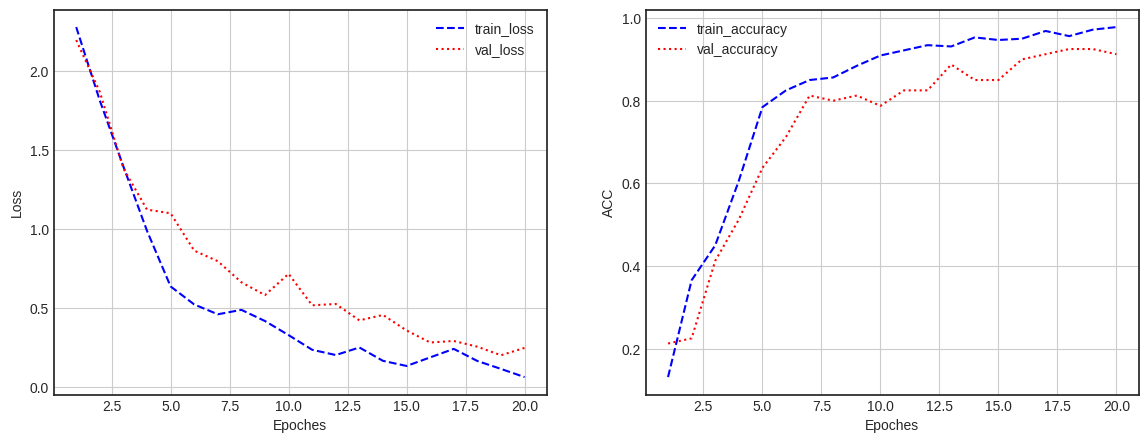

In [ ]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 5s 1s/step - loss: 0.1690 - acc: 0.9200


[0.1690255105495453, 0.9200000166893005]

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [ ]:
audio_mfcc = []
for y in audio:
  ret = librosa.feature.mfcc(y=y, sr=sr)
  audio_mfcc.append(ret)

<ipython-input-20-0fffbfc3f71e>:6: UserWarning: Glyph 9839 (\N{MUSIC SHARP SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9839 (\N{MUSIC SHARP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


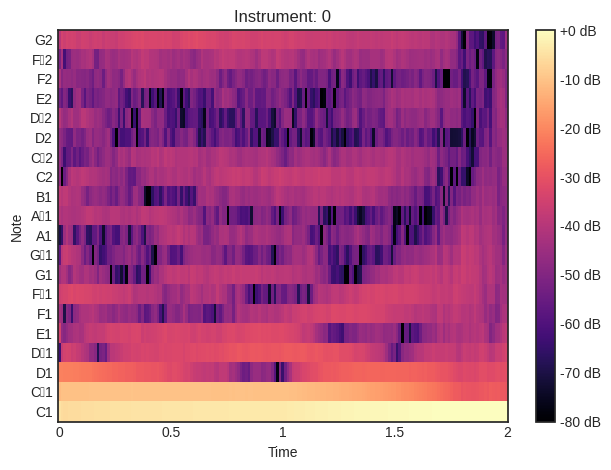

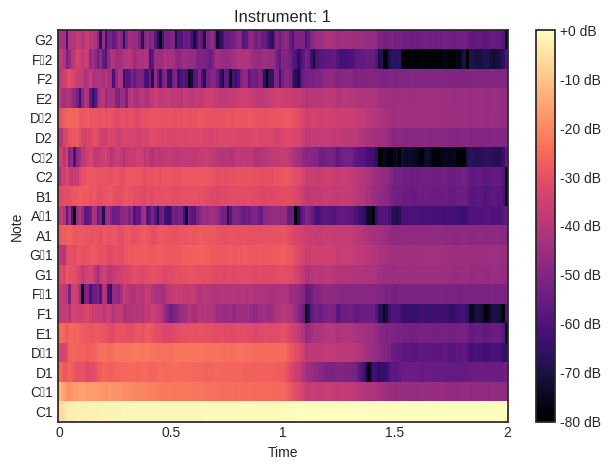

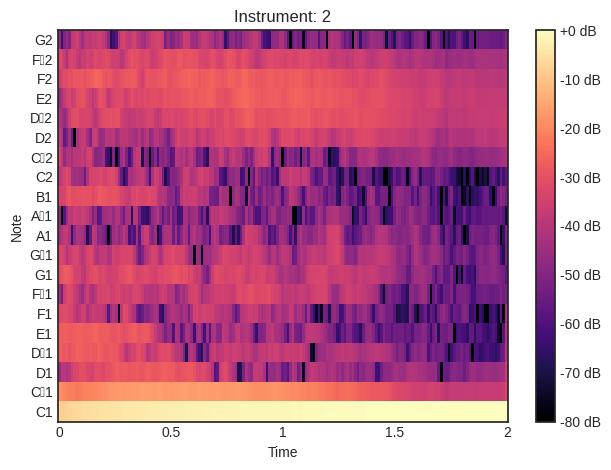

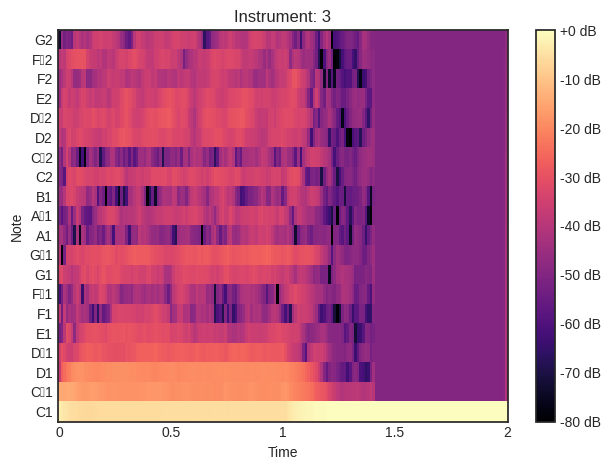

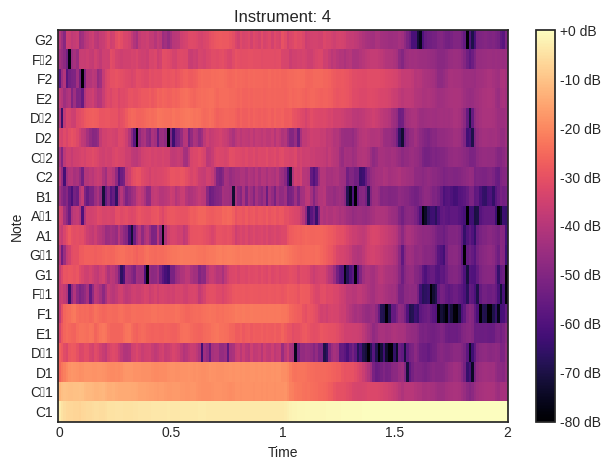

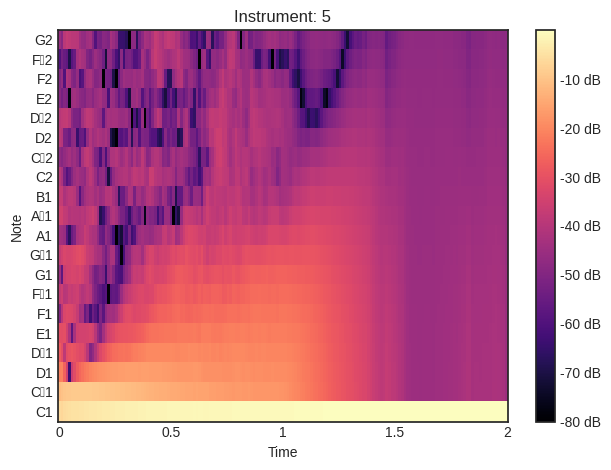

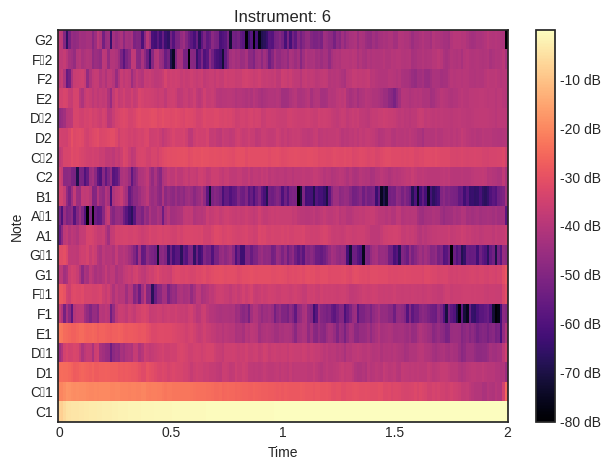

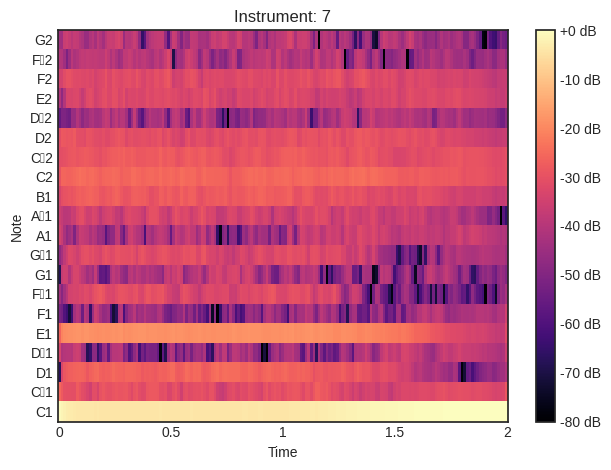

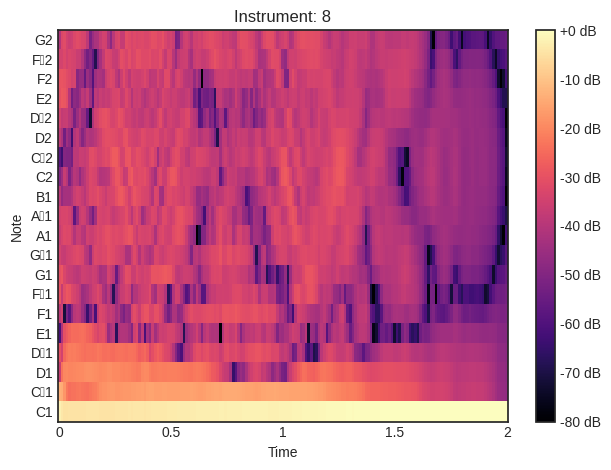

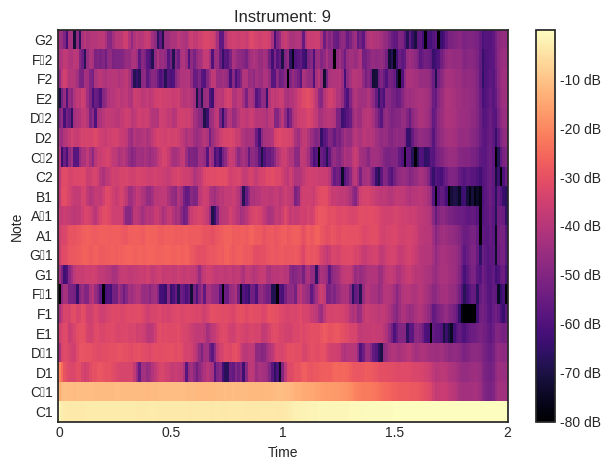

In [ ]:
for i in range(0, len(instruments)*num_notes, num_notes):
  amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]), ref=np.max)
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Instrument: {}'.format(inst[i]))
  plt.tight_layout()
  plt.show()

In [ ]:
mfcc_np = np.array(audio_mfcc, np.float32)
inst_np = np.array(inst, np.int16)

print(mfcc_np.shape, inst_np.shape)

NameError: name 'audio_mfcc' is not defined



*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
mfcc_np = mfcc_np.reshape(500, 20*173)



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(mfcc_np, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(train_y.shape)

(400, 3460)
(100, 3460)
(400,)
(400,)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.93


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.95


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.78


## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
import numpy as np
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_np = mfcc_np.reshape((500, 20 * 173))
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

NameError: name 'audio_mfcc' is not defined

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
  model = Sequential()

  input = Input(shape=(3460, ), name = 'input')
  output = Dense(512, activation='relu', name='hidden1')(input)
  output = Dense(256, activation='relu', name='hidden2')(output)
  output = Dense(128, activation='relu', name='hidden3')(output)
  output = Dense(10, activation='softmax', name='hidden4')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])

  return model

In [ ]:
model = model_build()
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14616)]           0         
                                                                 
 hidden1 (Dense)             (None, 512)               7483904   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7649418 (29.18 MB)
Trainable params: 7649418 (29.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 3s 483ms/step - loss: 2.2470 - acc: 0.1219 - val_loss: 2.2102 - val_acc: 0.1250
Epoch 2/30
3/3 [==============================] - 1s 365ms/step - loss: 1.9204 - acc: 0.4187 - val_loss: 2.0994 - val_acc: 0.1750
Epoch 3/30
3/3 [==============================] - 1s 284ms/step - loss: 1.6155 - acc: 0.6031 - val_loss: 2.0058 - val_acc: 0.3000
Epoch 4/30
3/3 [==============================] - 1s 237ms/step - loss: 1.3332 - acc: 0.6406 - val_loss: 1.9359 - val_acc: 0.2500
Epoch 5/30
3/3 [==============================] - 0s 157ms/step - loss: 1.0706 - acc: 0.6969 - val_loss: 2.0610 - val_acc: 0.3000
Epoch 6/30
3/3 [==============================] - 0s 153ms/step - loss: 0.8568 - acc: 0.7844 - val_loss: 2.2363 - val_acc: 0.3250
Epoch 7/30
3/3 [==============================] - 0s 135ms/step - loss: 0.6944 - acc: 0.8062 - val_loss: 2.5382 - val_acc: 0.3125
Epoch 8/30
3/3 [==============================] - 0s 156ms/step - loss: 0.5752 - acc: 0.83

In [ ]:
def plot_history(history_dict):
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(loss) + 1)
  fig = plt.figure(figsize=(14, 5))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, loss, 'b--', label='train_loss')
  ax1.plot(epochs, val_loss, 'r:', label='val_loss')
  ax1.set_xlabel('Epoches')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  acc = history_dict['acc']
  val_acc = history_dict['val_acc']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, acc, 'b--', label='train_accuracy')
  ax2.plot(epochs, val_acc, 'r:', label='val_accuracy')
  ax2.set_xlabel('Epoches')
  ax2.set_ylabel('ACC')
  ax2.grid()
  ax2.legend()

  plt.show()

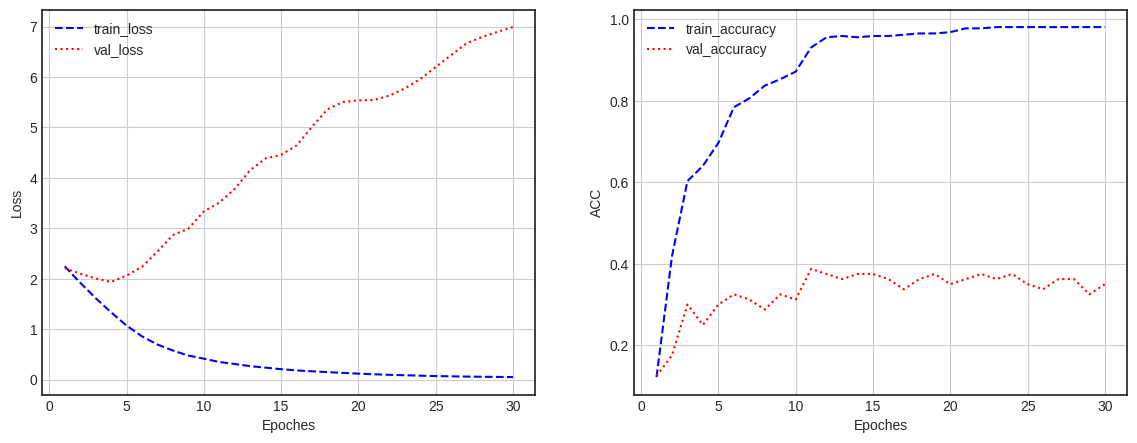

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 27ms/step - loss: 5.3089 - acc: 0.4500


[5.308887958526611, 0.44999998807907104]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
  model = Sequential()

  input = Input(shape=(20, 173, 1))

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dense(258, activation='relu')(output)
  output = Dense(126, activation='relu')(output)

  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])

  return model

In [ ]:
model = model_build()
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

NameError: name 'model' is not defined

In [ ]:
plot_history(history.history)